In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import datetime
import calendar
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
# Reads file  
df = pd.read_csv("data/tweets.csv", encoding ="utf-8", parse_dates=['tweet_created']) 

In [3]:
df['date'] = [d.date() for d in df['tweet_created']]
df['time'] = [d.time() for d in df['tweet_created']]

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015-02-24,11:35:52
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:15:59
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015-02-24,11:15:48
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:15:36
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:14:45


In [5]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

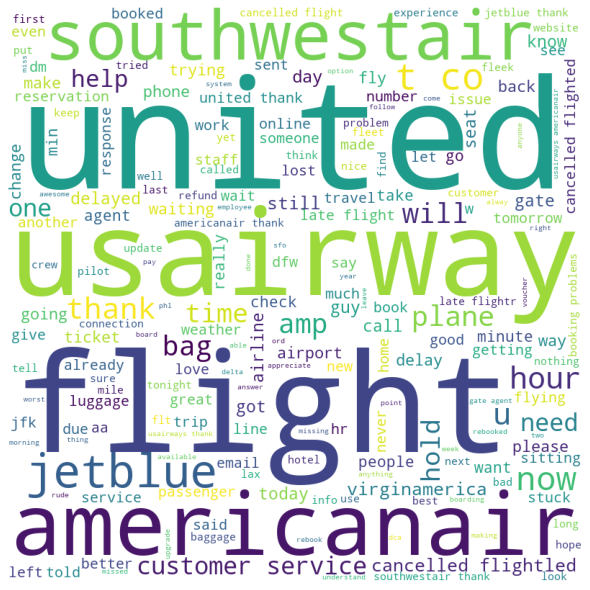

In [6]:
# Creates the word tag cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [7]:
dfi = pd.to_datetime(df['date'])

In [8]:
s = dfi.min()

In [9]:
e = dfi.max()

In [10]:
print (s, e)

2015-02-16 00:00:00 2015-02-24 00:00:00


In [11]:
e_cond = dfi=='2015-02-24'
print(e_cond.head())

0    True
1    True
2    True
3    True
4    True
Name: date, dtype: bool


In [12]:
s_cond = dfi=='2015-02-17'
print(s_cond.head())

0    False
1    False
2    False
3    False
4    False
Name: date, dtype: bool


In [13]:
s_df = df[s_cond]
print(s_df.shape)

(1408, 17)


In [14]:
s_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
450,5.679463e+17,negative,1.0000,Customer Service Issue,0.6977,Virgin America,NaN,helenalor,NaN,0,@VirginAmerica I have lots of flights to book ...,"[0.0, 0.0]",2015-02-17 23:18:49-08:00,San Francisco,Eastern Time (US & Canada),2015-02-17,23:18:49
451,5.679088e+17,positive,0.6431,NaN,NaN,Virgin America,NaN,HaraLillier,NaN,0,@VirginAmerica I am all about the in flight ar...,NaN,2015-02-17 20:49:43-08:00,NaN,Atlantic Time (Canada),2015-02-17,20:49:43
452,5.678995e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,helenhoppock,NaN,0,@VirginAmerica does Virgin America fly direct ...,NaN,2015-02-17 20:12:44-08:00,NaN,NaN,2015-02-17,20:12:44
453,5.678932e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,KallysAlbertSr,NaN,0,@VirginAmerica That's classy.,NaN,2015-02-17 19:47:44-08:00,USA,NaN,2015-02-17,19:47:44
454,5.678737e+17,positive,0.6681,NaN,NaN,Virgin America,NaN,Price714,NaN,0,@VirginAmerica I'm sure a lot of your 747 and ...,NaN,2015-02-17 18:30:15-08:00,"Hamilton, Ohio",Atlantic Time (Canada),2015-02-17,18:30:15


In [15]:
e_df = df[e_cond]
print(e_df.shape)

(1344, 17)


In [16]:
e_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015-02-24,11:35:52
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:15:59
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015-02-24,11:15:48
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:15:36
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:14:45


In [17]:
def get_content_of_df(df):
    
    comment_words = '' 
    stopwords = set(STOPWORDS) 
  
    # iterate through the csv file 
    df = pd.DataFrame(df)
    for val in df.text: 
      
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        comment_words += " ".join(tokens)+" "  
        
    return comment_words

In [18]:
trial = get_content_of_df(s_df)
print (trial)

@virginamerica i have lots of flights to book and your site it not working!!!! i've been on the phone waiting for over 10 minutes.......... @virginamerica i am all about the in flight artisanal cheese and wine pairing. @virginamerica does virgin america fly direct from seattle to nyc or boston? @virginamerica that's classy. @virginamerica i'm sure a lot of your 747 and 777 jfk-lhr flights go a lot faster than 513mph with a strong tailwind. @virginamerica now it's just t-minus 32 minutes until my elevate a silver upgrade window opens . #freeneversucks 😃👍 @virginamerica save some for 871 tomorrow am! @virginamerica why is it taking 12 years to fly home to dallas? get your shit together. @virginamerica @jezziegoldz club virgin is bumping in new york http://t.co/haqc7gdg7c @virginamerica @jezziegoldz would have been a rough trip but luckily we were on a #virginamerica flight. #weather @virginamerica is that #thestarter??😁 @virginamerica ...please come to minneapolis st. paul! @virginameric

In [24]:
def build_wg(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          stopwords = stopwords, 
                          min_font_size = 10).generate(trial) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

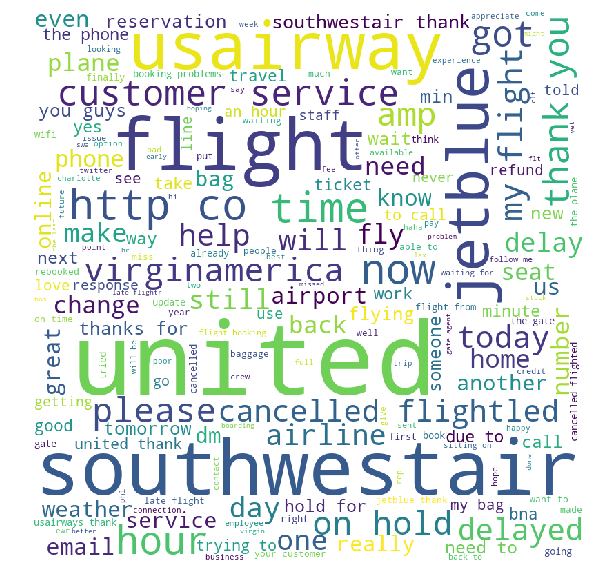

In [25]:
build_wg(trial)

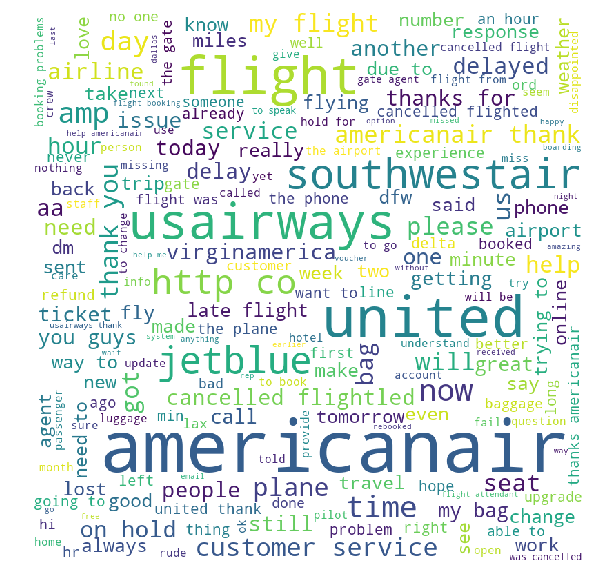

In [26]:
trial = get_content_of_df(e_df)
build_wg(trial)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 17 columns):
tweet_id                        14640 non-null float64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null datetime64[ns]
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
date                            14640 non-null object
time                       